In [1]:
from pathlib import Path
import sys

PROJECT_ROOT = Path("/Users/loso/code/hildieleyser/inkling")

if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print(PROJECT_ROOT)


/Users/loso/code/hildieleyser/inkling


In [2]:
from zaki_EMG_packages.extract import list_datasets, load_emg

In [3]:
emg_file = Path("/Users/loso/Downloads/EMG-nature_data_participant_1_participant1_day1_block1_emg_data (2).hdf5")

print(emg_file.exists())

True


In [4]:
datasets = list_datasets(emg_file)
print(datasets)
#each key is one signal

['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [5]:
#each key is one signal
emg = load_emg(emg_file, dataset_name="0")
print(type(emg))
print(emg.shape)

<class 'numpy.ndarray'>
(16, 9980)


In [6]:
emg

array([[ 3.76349817e-05,  1.98425078e-05,  9.07169760e-06, ...,
        -7.89036676e-06, -1.49826537e-05, -1.43748375e-05],
       [ 2.48200813e-05,  2.62004924e-05,  2.57970714e-05, ...,
         2.36397518e-05,  2.26163229e-05,  2.11052029e-05],
       [ 7.70358292e-06,  9.89300042e-06,  1.07674778e-05, ...,
         1.03989842e-05,  9.96852668e-06,  9.72673752e-06],
       ...,
       [-8.37383777e-06, -1.24599992e-05, -1.28278034e-05, ...,
        -1.55725484e-05, -1.43470406e-05, -1.06217649e-05],
       [-1.57952236e-05, -1.61320277e-05, -1.29005557e-05, ...,
        -9.94938546e-06, -9.96866675e-06, -1.09153243e-05],
       [-1.30936751e-05, -1.76599133e-05, -1.61400549e-05, ...,
        -1.25840334e-05, -1.46363518e-05, -1.61670978e-05]], dtype=float32)

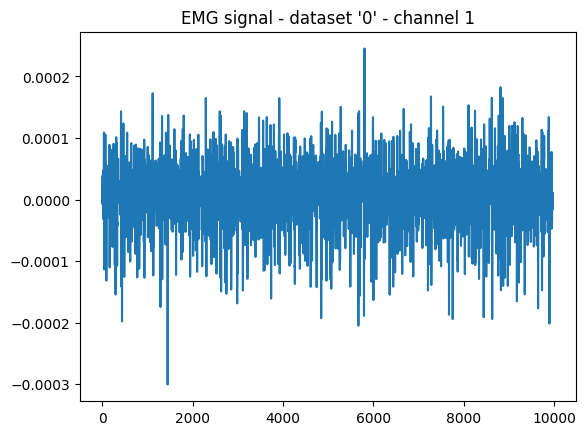

In [7]:
import matplotlib.pyplot as plt

plt.plot(emg[0])  # channel 1
plt.title("EMG signal - dataset '0' - channel 1")
plt.show()

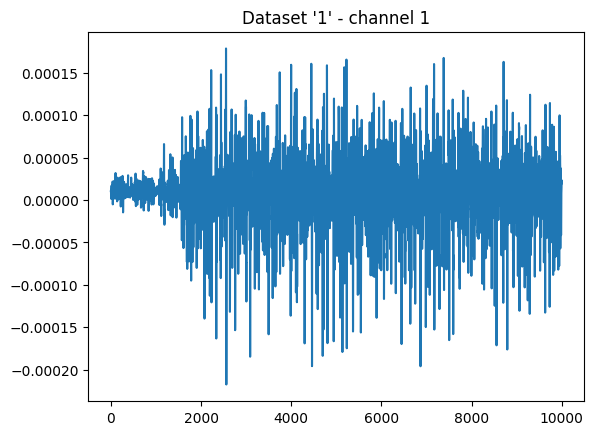

In [8]:
emg2 = load_emg(emg_file, dataset_name="1")
plt.plot(emg2[0])
plt.title("Dataset '1' - channel 1")
plt.show()


In [9]:
for key in ['0', '1', '2', '3']:
    sig = load_emg(emg_file, dataset_name=key)
    print(key, sig.shape)


0 (16, 9980)
1 (16, 10000)
2 (16, 9960)
3 (16, 10020)


In [10]:
from zaki_EMG_packages.preprocess import fix_length, reshape_for_model


In [11]:
emg0 = load_emg(emg_file, dataset_name="0")
print("raw shape:", emg0.shape)


raw shape: (16, 9980)


In [12]:
emg0_fixed = fix_length(emg0, target_length=10000)
print("fixed shape:", emg0_fixed.shape)


fixed shape: (16, 10000)


In [13]:
x0 = reshape_for_model(emg0_fixed)
print("ready for model:", x0.shape)


ready for model: (1, 10000, 16)


In [14]:
from pathlib import Path
import sys

PROJECT_ROOT = Path("/Users/loso/code/hildieleyser/inkling")
sys.path.append(str(PROJECT_ROOT))

from zaki_EMG_packages.predict import predict_from_hdf5

file = Path('/Users/loso/Downloads/EMG-nature_data_participant_6_participant6_day2_block1_emg_data.hdf5')
print("Prediction:", predict_from_hdf5(file, dataset_name="0"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: 1


In [19]:
import h5py
from pathlib import Path

file = Path('/Users/loso/Downloads/EMG-nature_data_participant_6_participant6_day2_block1_emg_data.hdf5')

with h5py.File(file, "r") as f:
    print("\n📌 HDF5 top-level keys:")
    keys = list(f.keys())
    print(keys)

    print("\n📌 Shapes + dtypes of each dataset:")
    for k in keys:
        data = f[k]
        print(f"{k}: shape={data.shape}, dtype={data.dtype}")



📌 HDF5 top-level keys:
['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']

📌 Shapes + dtypes of each dataset:

In [20]:
from pathlib import Path
import h5py
from zaki_EMG_packages.predict import predict_from_hdf5

file = Path('/Users/loso/Downloads/EMG-nature_data_participant_6_participant6_day2_block1_emg_data.hdf5')

with h5py.File(file, "r") as f:
    print("Dataset → prediction")
    for k in f.keys():        # k is '0', '1', '2', ... '149'
        pred = predict_from_hdf5(file, dataset_name=k)
        print(f"{k}: {pred}")


Dataset → prediction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
10: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
100: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
101: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
102: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
103: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
104: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
105: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
106: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
107: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
108: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
109: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
11: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
110: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
111: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
112: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
113: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
114: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
115: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
116: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
11

In [17]:
# from zaki_EMG_packages.predict import predict_from_hdf5
# from pathlib import Path

# f = Path("/Users/loso/Downloads/your_file.hdf5")

# for key in ["0", "1", "2"]:
#     print(key, "→", predict_from_hdf5(f, dataset_name=key))


In [18]:
import h5py
with h5py.File("/Users/loso/Downloads/EMG-nature_data_block1.hdf5", "r") as f:
    print(list(f.keys()))

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/Users/loso/Downloads/EMG-nature_data_block1.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## model 2 tests

In [1]:
from zaki_EMG_packages import model
import inspect

print("LOADED FILE:", model.__file__)
print(inspect.getsource(model))


LOADED FILE: /Users/loso/code/hildieleyser/inkling/zaki_EMG_packages/model.py
# zaki_EMG_packages/model.py

from pathlib import Path

import joblib
from tensorflow.keras.models import load_model

# This file lives in: <PROJECT_ROOT>/zaki_EMG_packages/model.py
# We want:            <PROJECT_ROOT>/artifacts_emg/
PROJECT_ROOT = Path(__file__).resolve().parents[1]
ARTIFACTS_DIR = PROJECT_ROOT / "artifacts_emg"

MODEL_PATH = ARTIFACTS_DIR / "emg_cnn_4ch.h5"
SCALER_PATH = ARTIFACTS_DIR / "emg_scaler.pkl"

_model = None
_scaler = None


def get_model():
    """Lazy-load Keras model from artifacts_emg."""
    global _model
    if _model is None:
        _model = load_model(MODEL_PATH)
    return _model


def get_scaler():
    """Lazy-load StandardScaler from artifacts_emg."""
    global _scaler
    if _scaler is None:
        _scaler = joblib.load(SCALER_PATH)
    return _scaler



In [7]:
from pathlib import Path
from zaki_EMG_packages.model import get_model, get_scaler
from zaki_EMG_packages.extract import load_emg
from zaki_EMG_packages.preprocess import prepare_for_model

# Example local test file + dataset index
h5_path = Path("/Users/loso/Downloads/EMG-nature_data_participant_1_participant1_day1_block1_emg_data (1).hdf5")
signal = load_emg(h5_path, dataset_name="0")

scaler = get_scaler()
x = prepare_for_model(signal, scaler=scaler)

model = get_model()
proba = model.predict(x)[0, 0]
print("P(power):", proba)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
P(power): 1.0


In [10]:
import pandas as pd
from pathlib import Path

# 1. Point to the *matching* trials.csv for the HDF5 file you’re testing
trials_path = Path("/Users/loso/Downloads/EMG-nature_data_participant_7_participant7_day1_block1_trials.csv")
df = pd.read_csv(trials_path)

print(df.head())
print("\nGrasp value_counts:")
print(df["grasp"].value_counts())


   Unnamed: 0  row_number  target_position  grasp  trial_no  block
0           0           0                2      3         0      0
1           1           1                2      3         1      0
2           2           2                2      3         2      0
3           3           3                2      3         3      0
4           4           4                2      3         4      0

Grasp value_counts:
grasp
3    25
1    25
4    25
2    25
5    25
6    25
Name: count, dtype: int64


## get known power and rest trial indicies

In [11]:
# Power = 1, Rest = 6
power_rows = df[df["grasp"] == 1]
rest_rows  = df[df["grasp"] == 6]

# Grab a few example row_numbers for each
power_ids = power_rows["row_number"].head(3).tolist()
rest_ids  = rest_rows["row_number"].head(3).tolist()

print("Example POWER dataset indices:", power_ids)
print("Example REST dataset indices :", rest_ids)


Example POWER dataset indices: [5, 6, 7]
Example REST dataset indices : [75, 76, 77]


## now test those indices with packages

In [13]:
from pathlib import Path
from zaki_EMG_packages.predict import predict_from_hdf5

h5_path = Path("/Users/loso/Downloads/EMG-nature_data_participant_7_participant7_day1_block1_emg_data.hdf5")  # adjust name if needed

for idx in rest_ids + power_ids:
    pred = predict_from_hdf5(h5_path, dataset_name=str(idx))
    print(f"dataset {idx:3d} → pred={pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
dataset  75 → pred=0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
dataset  76 → pred=0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
dataset  77 → pred=0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
dataset   5 → pred=1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
dataset   6 → pred=1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
dataset   7 → pred=1


## test same trial through api

In [15]:
import requests

url = "http://localhost:8000/predict_emg"
file_path = "/Users/loso/Downloads/EMG-nature_data_participant_7_participant7_day1_block1_emg_data.hdf5"

for idx in rest_ids + power_ids:
    with open(file_path, "rb") as f:
        files = {"file": f}
        data = {"dataset": str(idx)}
        r = requests.post(url, files=files, data=data)
    print(f"dataset {idx:3d} →", r.json())


dataset  75 → {'result': 0, 'label': 'rest (no)'}
dataset  76 → {'result': 0, 'label': 'rest (no)'}
dataset  77 → {'result': 0, 'label': 'rest (no)'}
dataset   5 → {'result': 1, 'label': 'power (yes)'}
dataset   6 → {'result': 1, 'label': 'power (yes)'}
dataset   7 → {'result': 1, 'label': 'power (yes)'}


further test


In [16]:
import pandas as pd
from pathlib import Path

trials_path = Path("/Users/loso/Downloads/EMG-nature_data_participant_7_participant7_day1_block1_trials.csv")
df = pd.read_csv(trials_path)

# grab one rest and one power trial
rest_idx  = int(df[df["grasp"] == 6]["row_number"].iloc[0])  # 6 = rest
power_idx = int(df[df["grasp"] == 1]["row_number"].iloc[0])  # 1 = power

print("rest_idx :", rest_idx)
print("power_idx:", power_idx)


rest_idx : 75
power_idx: 5


In [17]:
import numpy as np
from zaki_EMG_packages.extract import load_emg
from zaki_EMG_packages.preprocess import BEST_CHANNELS, fix_length, INPUT_LENGTH

h5_path = Path("/Users/loso/Downloads/EMG-nature_data_participant_7_participant7_day1_block1_emg_data.hdf5")

def get_4ch_for_trial(trial_idx: int) -> np.ndarray:
    sig_16 = load_emg(h5_path, dataset_name=str(trial_idx))    # (16, N)
    sig_4  = sig_16[list(BEST_CHANNELS), :]                    # (4, N)
    sig_4  = fix_length(sig_4, target_length=INPUT_LENGTH)     # (4, 9940)
    return sig_4

rest_4  = get_4ch_for_trial(rest_idx)
power_4 = get_4ch_for_trial(power_idx)

print(rest_4.shape, power_4.shape)  # both should be (4, 9940)


(4, 9940) (4, 9940)


In [18]:
import requests

url = "http://127.0.0.1:8000/predict_emg_live"

for name, arr in [("REST", rest_4), ("POWER", power_4)]:
    payload = {"emg": arr.tolist()}
    r = requests.post(url, json=payload)
    print(name, "→", r.json())


REST → {'result': 0, 'label': 'rest (no)', 'proba_power': 0.0034562700893729925}
POWER → {'result': 1, 'label': 'power (yes)', 'proba_power': 1.0}


## test a real no data signal

In [19]:
import json

rest_payload = {"emg": rest_4.tolist()}
power_payload = {"emg": power_4.tolist()}

print("REST JSON:")
print(json.dumps(rest_payload))

print("\nPOWER JSON:")
print(json.dumps(power_payload))


REST JSON:
{"emg": [[1.1595491741900332e-05, 1.3388050319917966e-05, 1.5547739167232066e-05, 1.9126418919768184e-05, 2.1743459001299925e-05, 2.1153791749384254e-05, 1.9955523384851404e-05, 2.040106846834533e-05, 1.9810579033219256e-05, 1.9578985302359797e-05, 1.7505581126897596e-05, 1.6441599655081518e-05, 1.5862458894844167e-05, 1.5470975995413028e-05, 1.5785017239977606e-05, 1.8630998965818435e-05, 2.0377510736580007e-05, 2.046540248556994e-05, 1.9895400328096002e-05, 2.0460640371311456e-05, 2.0494497221079655e-05, 1.8677737898542546e-05, 1.553914808027912e-05, 1.4974352779972833e-05, 1.6686237358953804e-05, 1.8888698832597584e-05, 1.815314135455992e-05, 1.917966983455699e-05, 1.9684788640006445e-05, 1.8774973796098493e-05, 1.681720641499851e-05, 1.5081165656738449e-05, 1.5577348676742986e-05, 1.6533787857042626e-05, 1.591969521541614e-05, 1.574845373397693e-05, 1.7590131392353214e-05, 1.546617568237707e-05, 1.378385513817193e-05, 1.2257632079126779e-05, 1.3214264072303195e-05, 1.341